<a href="https://colab.research.google.com/github/Joy-ne-r/FUTURE_DS_03/blob/main/Student_feedback_survey_responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Student feedback survey responses analysis



In [3]:
import os
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:

# Download latest version
path = kagglehub.dataset_download("ruchi798/student-feedback-survey-responses")

print("Path to dataset files:", path)


100%|██████████| 10.0k/10.0k [00:00<00:00, 10.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ruchi798/student-feedback-survey-responses/versions/1


In [5]:


# The path returned by kagglehub
print("Path to dataset files:", path)

# List all files in the dataset folder
files = os.listdir(path)
print("Files in dataset:", files)

# Assuming the dataset is a CSV file, pick the first one
csv_file = os.path.join(path, files[0])

# Load into pandas
Satisfaction_df = pd.read_csv(csv_file)

# Preview the first few rows
Satisfaction_df.head()




Path to dataset files: /root/.cache/kagglehub/datasets/ruchi798/student-feedback-survey-responses/versions/1
Files in dataset: ['student_feedback.csv']


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [6]:
#Displays the shape of the df, number of rows and columns
Satisfaction_df.shape

(1001, 10)

In [7]:
#Displays the content of the data frame
Satisfaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [8]:
# Summary statistics
Satisfaction_df.describe()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
# Average score per question
mean_scores = Satisfaction_df.mean(numeric_only=True)
print(mean_scores)

Unnamed: 0                                              500.000000
Student ID                                              500.000000
Well versed with the subject                              7.497502
Explains concepts in an understandable way                6.081918
Use of presentations                                      5.942058
Degree of difficulty of assignments                       5.430569
Solves doubts willingly                                   5.474525
Structuring of the course                                 5.636364
Provides support for students going above and beyond      5.662338
Course recommendation based on relevance                  5.598402
dtype: float64


In [10]:
# Drop the first two columns (Student ID and index-like column)
ratings_only = Satisfaction_df.iloc[:, 2:] # keep only rating columns
# Average ratings per category
mean_scores = ratings_only.mean()

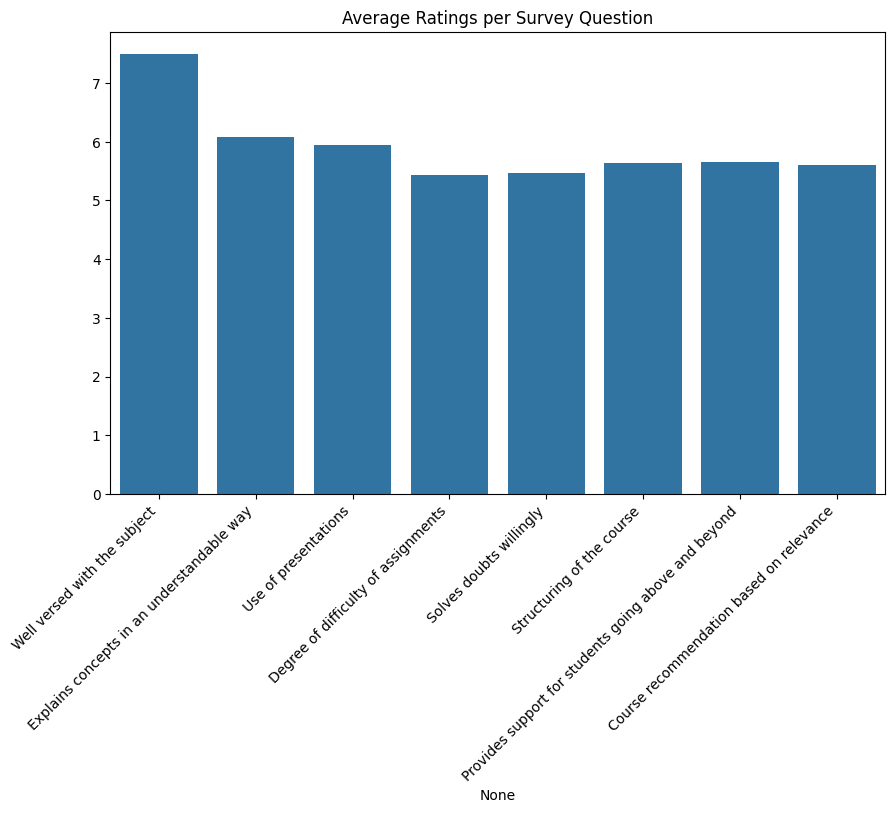

In [11]:
# Average ratings per category
plt.figure(figsize=(10,6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.xticks(rotation=45, ha="right")
plt.title("Average Ratings per Survey Question")
plt.show()

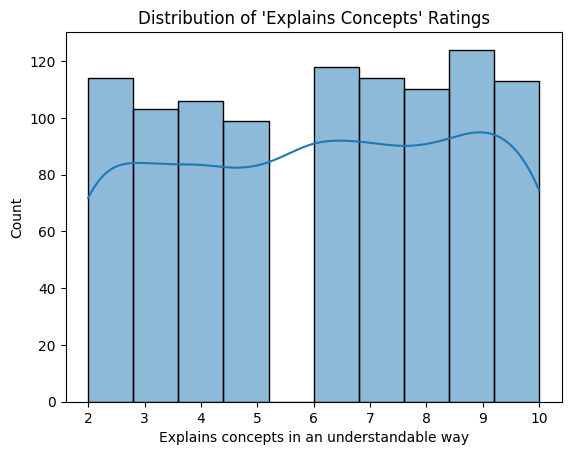

In [12]:
sns.histplot(Satisfaction_df['Explains concepts in an understandable way'], bins=10, kde=True)
plt.title("Distribution of 'Explains Concepts' Ratings")
plt.show()


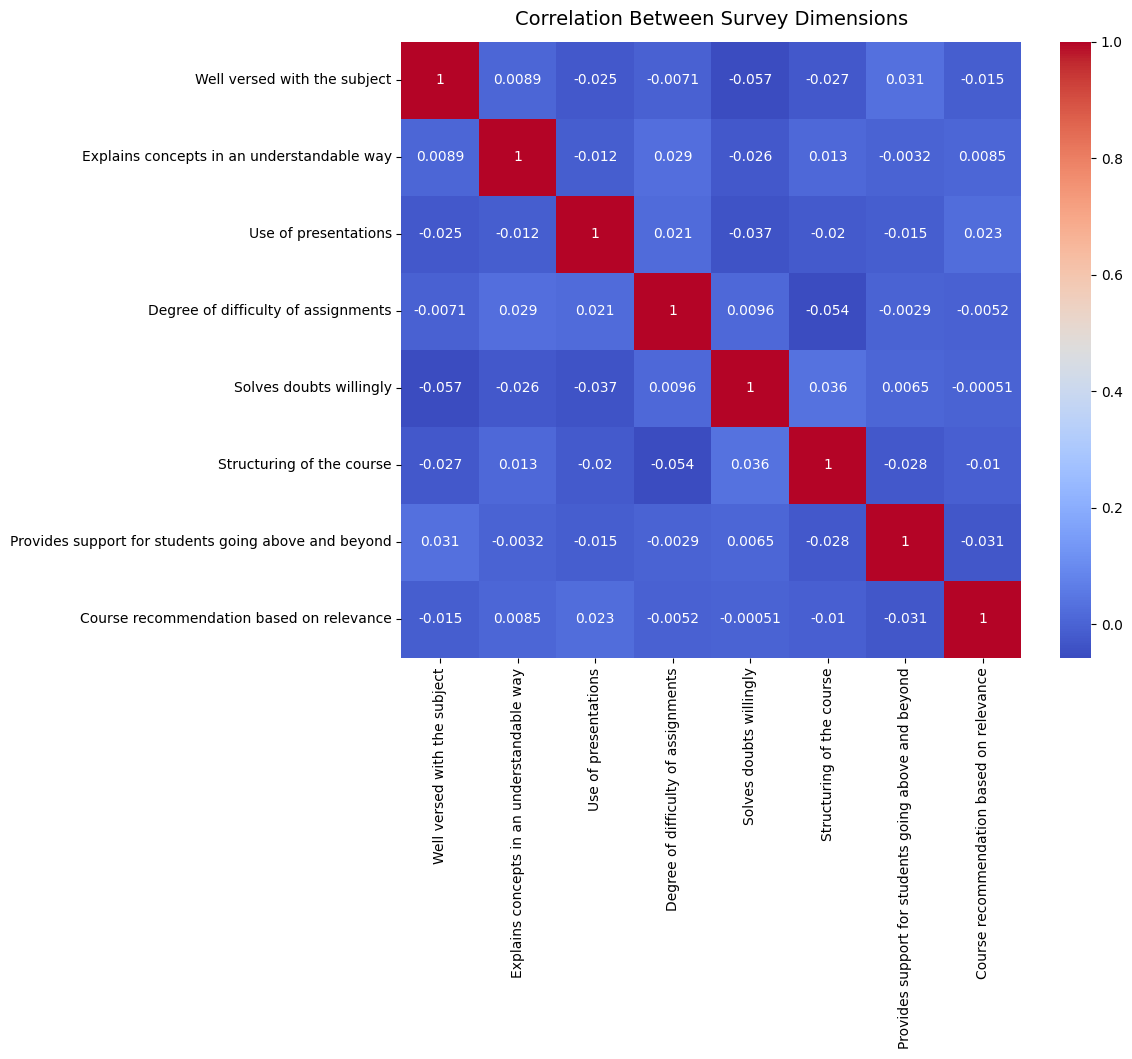

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(Satisfaction_df.iloc[:,2:].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Survey Dimensions", fontsize=14, pad=12) # add title
plt.show()

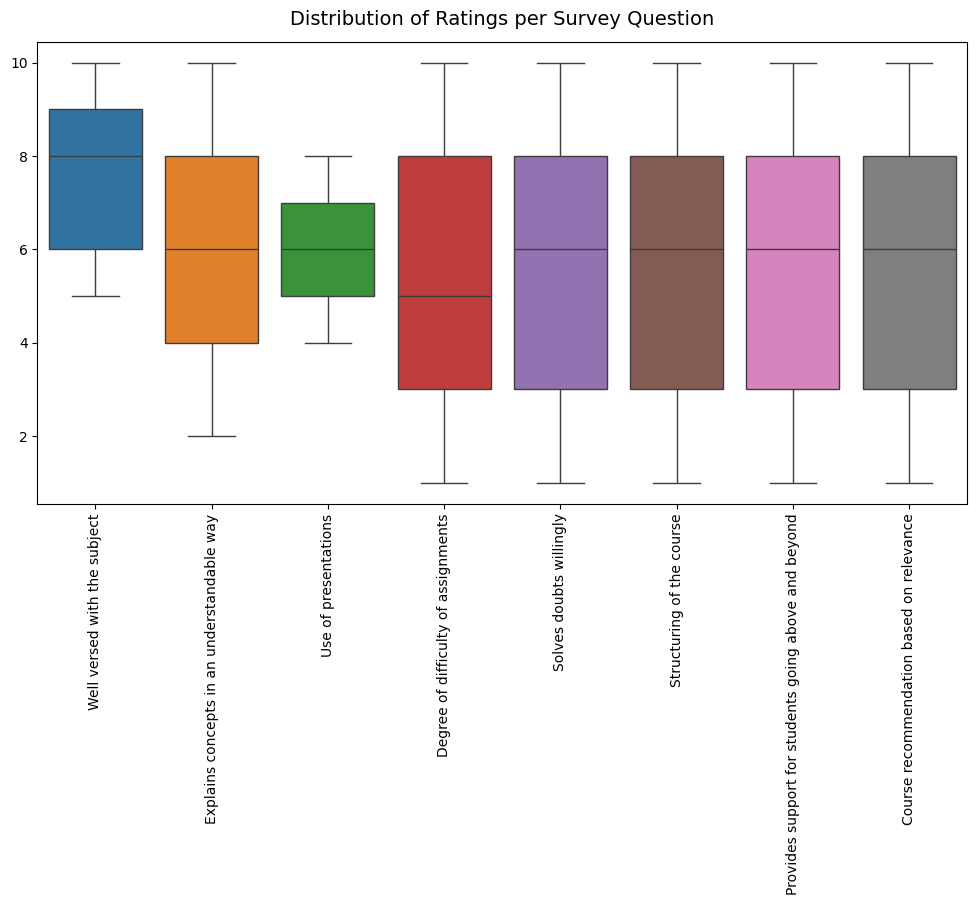

In [24]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=Satisfaction_df.iloc[:,2:])

# Add title
ax.set_title("Distribution of Ratings per Survey Question", fontsize=14, pad=12)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()



In [13]:
# Example: apply sentiment mapping to one column
def map_sentiment(score):
  if score <= 3: return "Negative"
  elif score <= 6: return "Neutral"
  else: return "Positive"

In [15]:
# Apply to all rating columns
ratings_only = Satisfaction_df.iloc[:, 2:] # drop ID columns
sentiment_df = ratings_only.applymap(map_sentiment)
sentiment_df.head()

/tmp/ipython-input-342574905.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sentiment_df = ratings_only.applymap(map_sentiment)


,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,Neutral,Negative,Positive,Neutral,Positive,Negative,Negative,Positive
1,Neutral,Neutral,Positive,Neutral,Negative,Negative,Negative,Positive
2,Positive,Positive,Neutral,Neutral,Neutral,Negative,Negative,Negative
3,Positive,Neutral,Positive,Negative,Neutral,Positive,Neutral,Neutral
4,Positive,Positive,Positive,Neutral,Neutral,Neutral,Positive,Positive


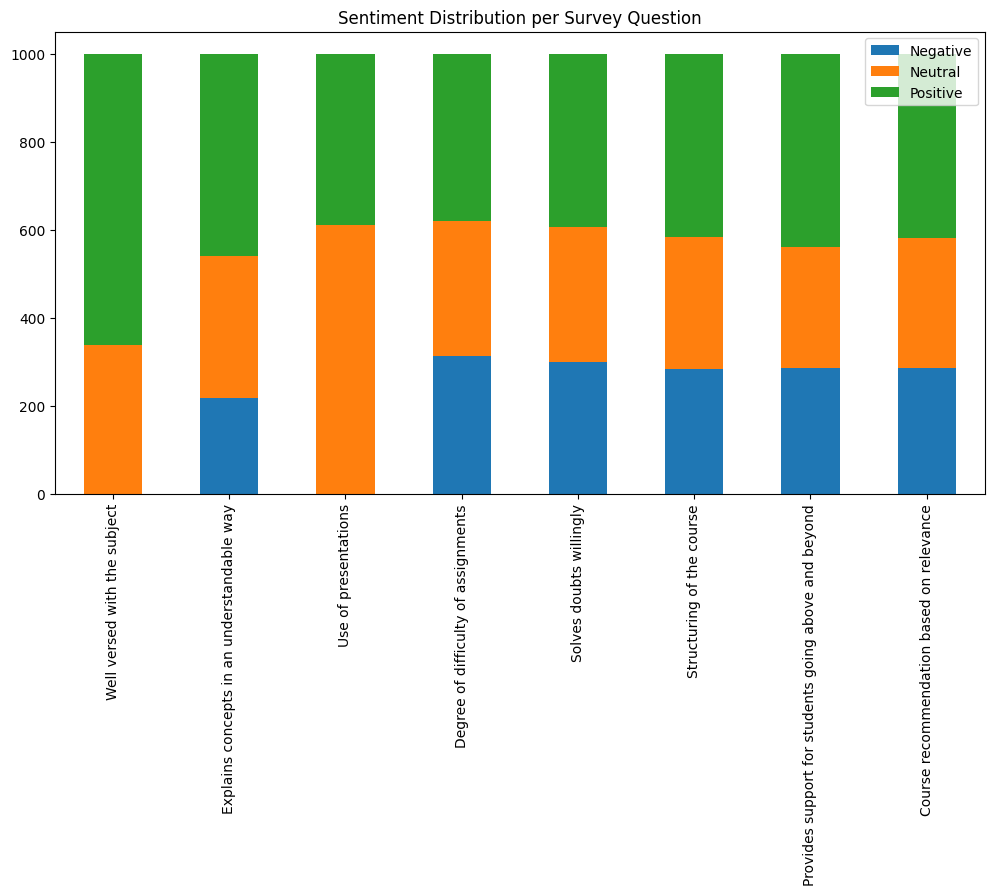

In [17]:
sentiment_counts = sentiment_df.apply(pd.Series.value_counts).fillna(0).T
ax = sentiment_counts.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_title("Sentiment Distribution per Survey Question") # add title
plt.show()